<b><h1 style="font-size:40px; color:red;">BANK MARKETING</h1></b>

<b style="font-size:25px;">1. Introduction</b>

<p>Bank marketing is <b>the design structure, layout and delivery of customer-needed services worked out by checking out the corporate objectives of the bank and environmental constraints.,</b><br><br>
A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.<br><br>
The investor must understand when buying a term deposit that they can withdraw their funds only after the term ends. In some cases, the account holder may allow the investor early termination or withdrawal—if they give several days notification. Also, there will be a penalty assessed for early termination.</p>

<b style="font-size:25px;">2. Objective</b>

<p>The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not (no) subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).</p>

<h1 style="font-size:25px;"><b>3. Data Loading and Preprocessing</b></h1>

In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Load Dataset
df=pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
#check the number of rows and columns
df.shape

(11162, 17)

Number of rows = 11162<br>
Number of columns = 17

In [9]:
#check the df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Columns of different datatypes are present in this dataframe

In [12]:
#describe df numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Statistical details of the dataframe.

<h1 style="font-size:25px;"><b>4. Exploratory Data Analysis</b></h1>

In [19]:
#categorical features and its unique values
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=="O") & (feature not in ["deposit"]))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

- There is 9 Categorical features.<br>
- Feature 'Job' and 'Month has highest number of categorical values.

In [22]:
#Checking null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Dataset does not contain null value.

In [25]:
#checking duplicates
df.duplicated().sum()

0

There is no duplicates in this dataset.

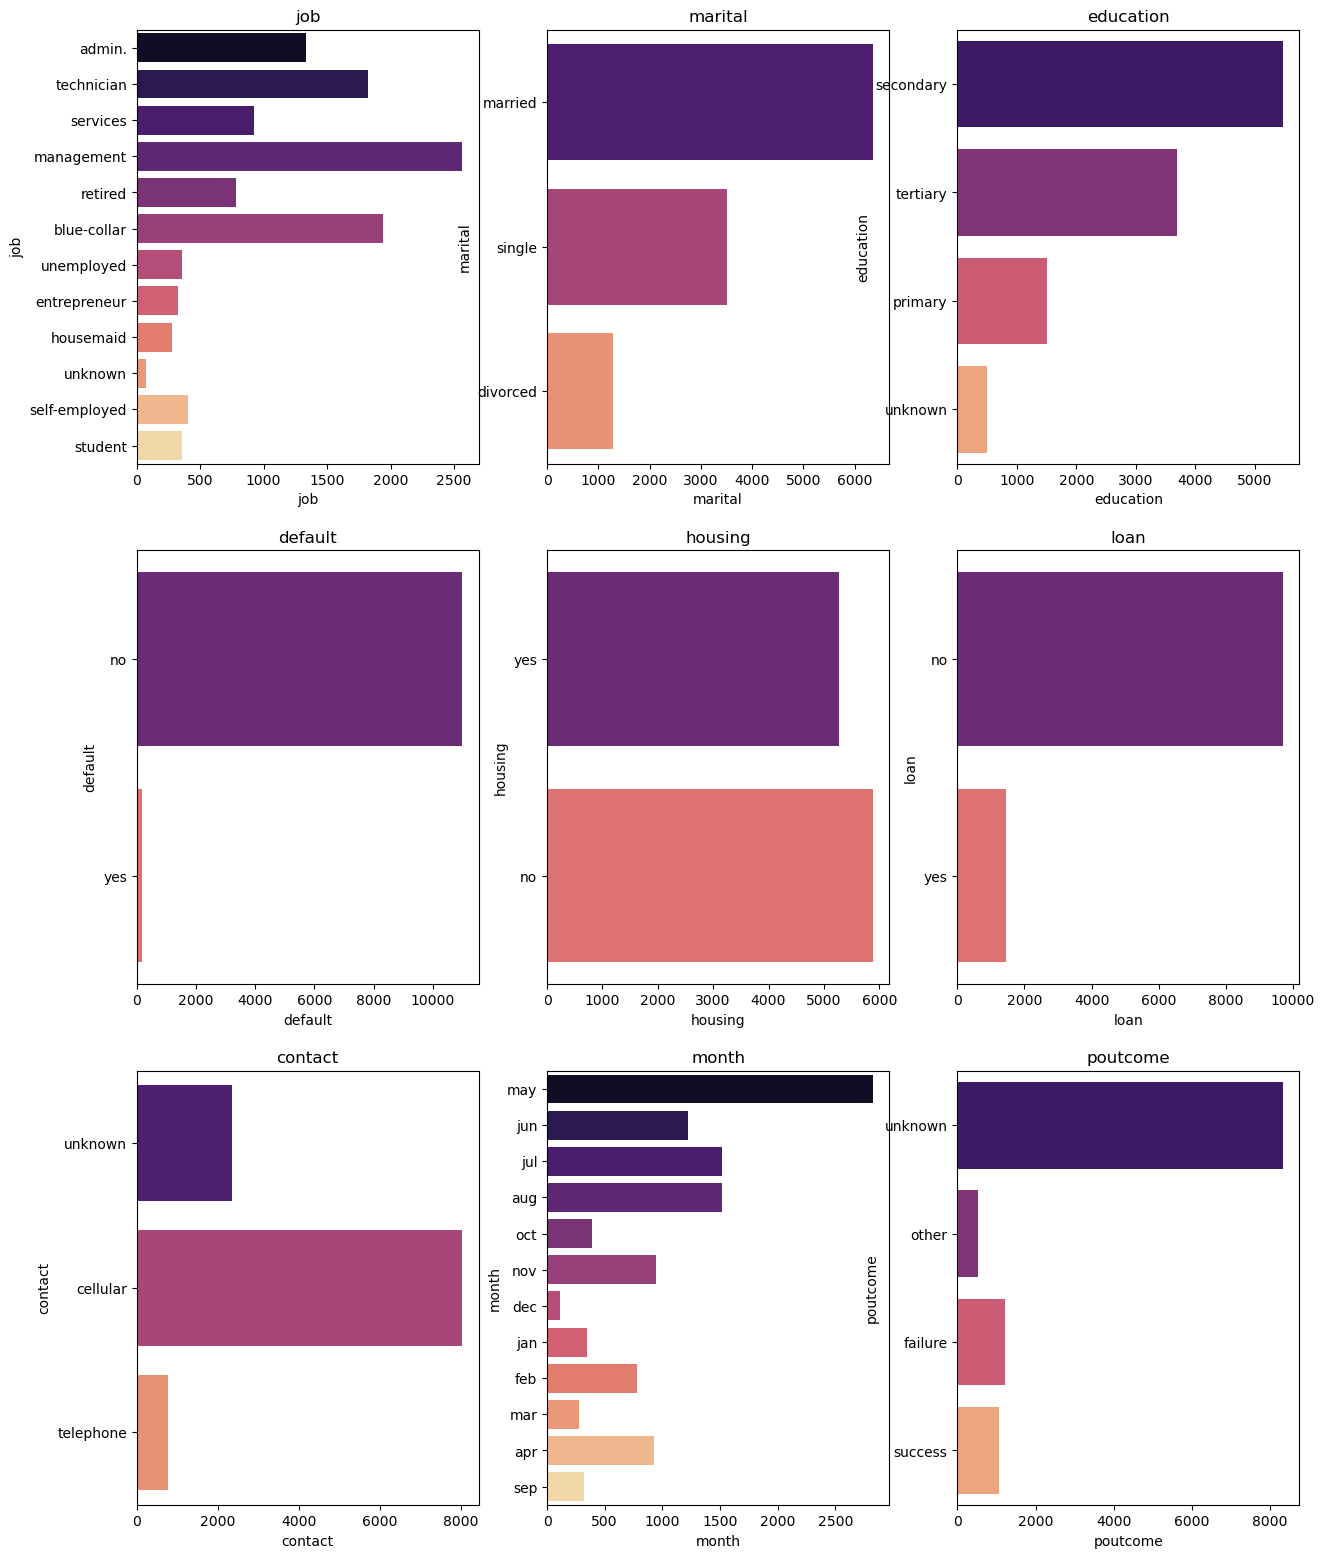

In [28]:
#check count based on categorical feature
plt.figure(figsize=(15,80), facecolor="white")
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df,palette="magma")
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

- Client with job type as blue-collar records are high in given dataset and student are very less.
- Client who married are high in records in given dataset and divorced are very less.
- Client whoes education background is secondary are in high numbers in given datasets
- default feature seems to be does not play important role as it has value of no at high ratio to value yes which can drop
- data in month of may is high and less in dec

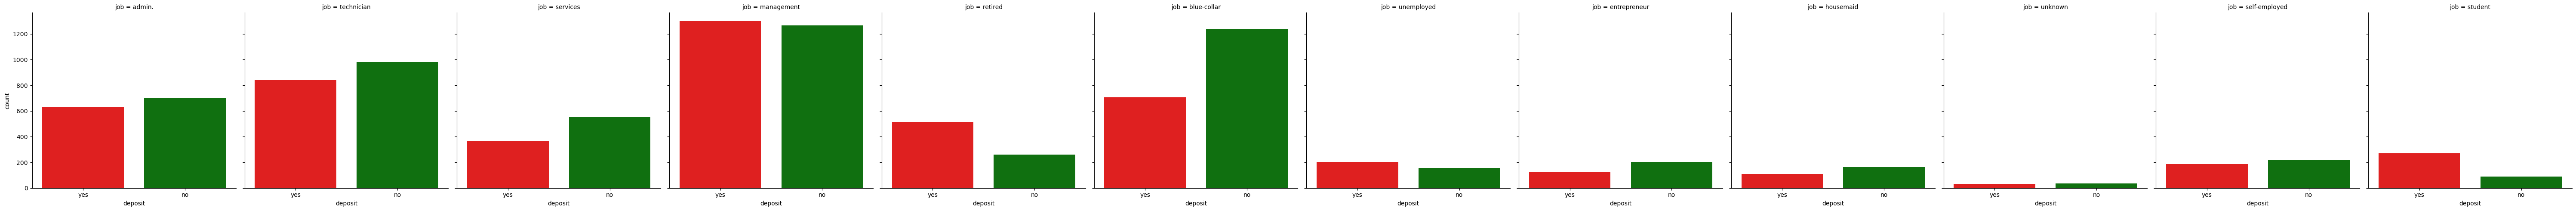

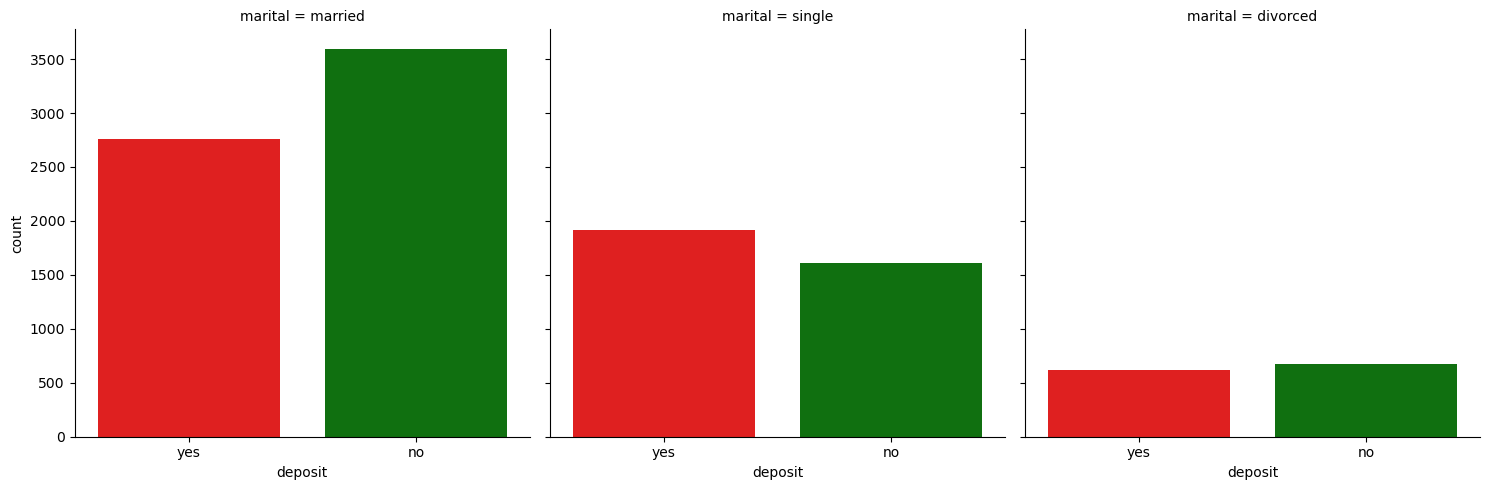

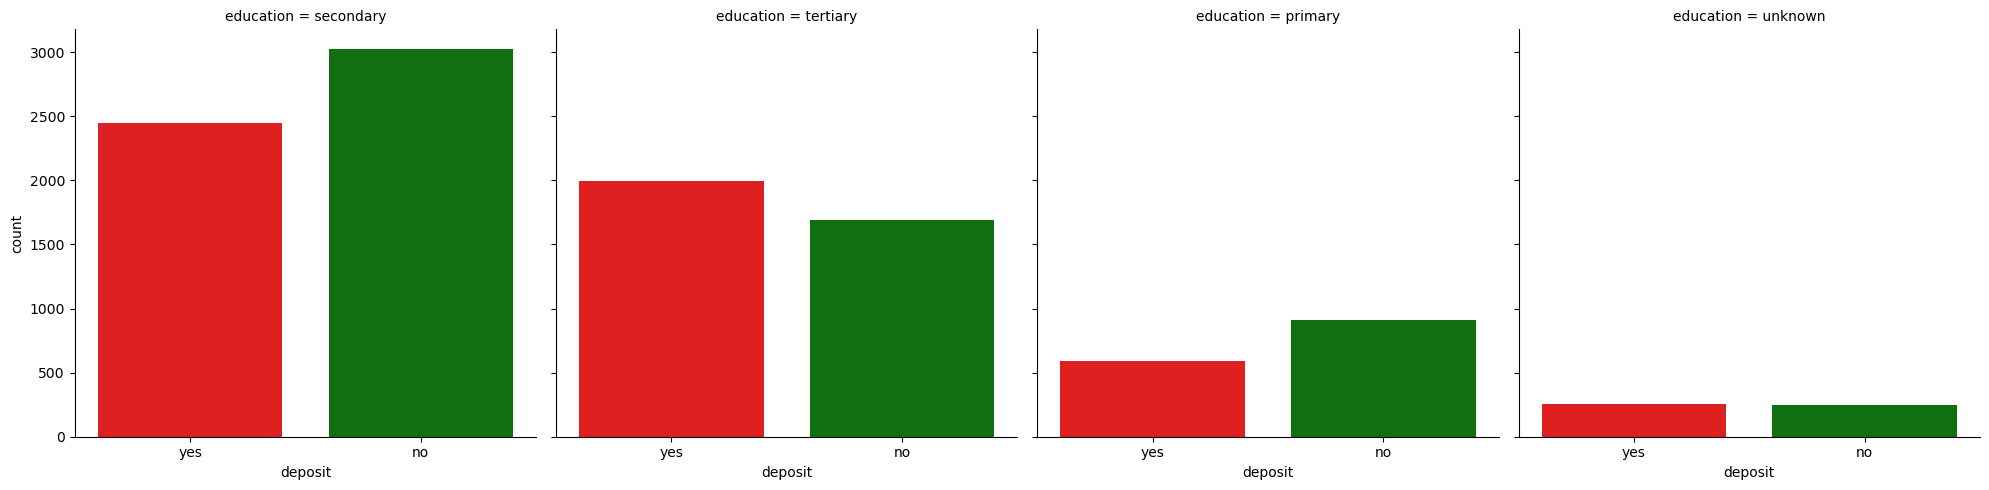

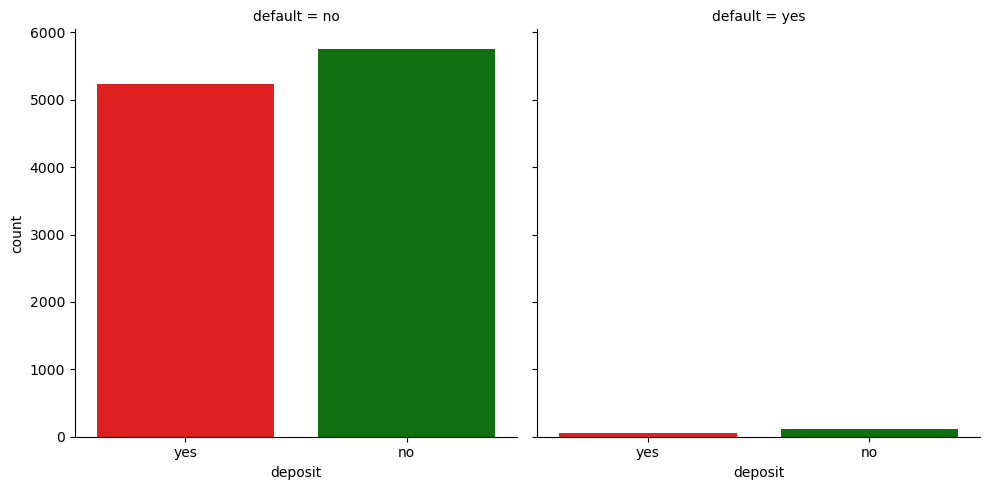

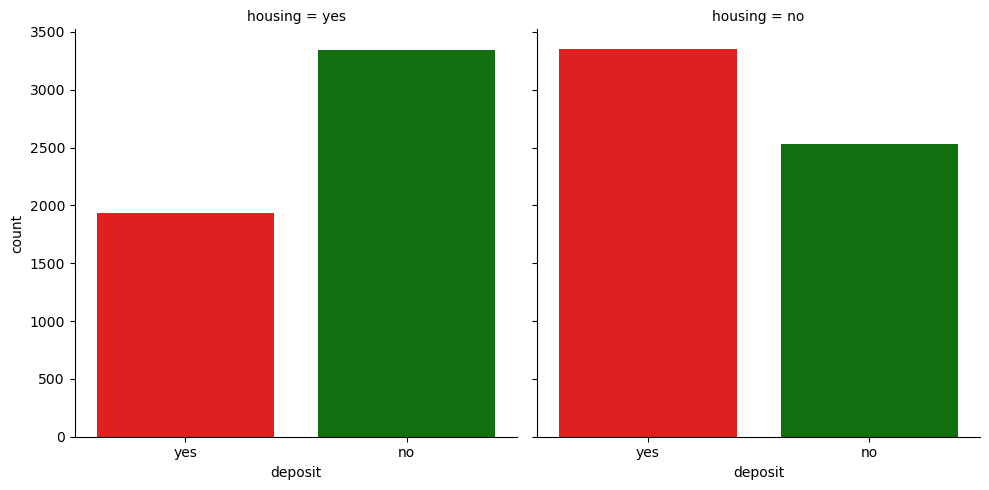

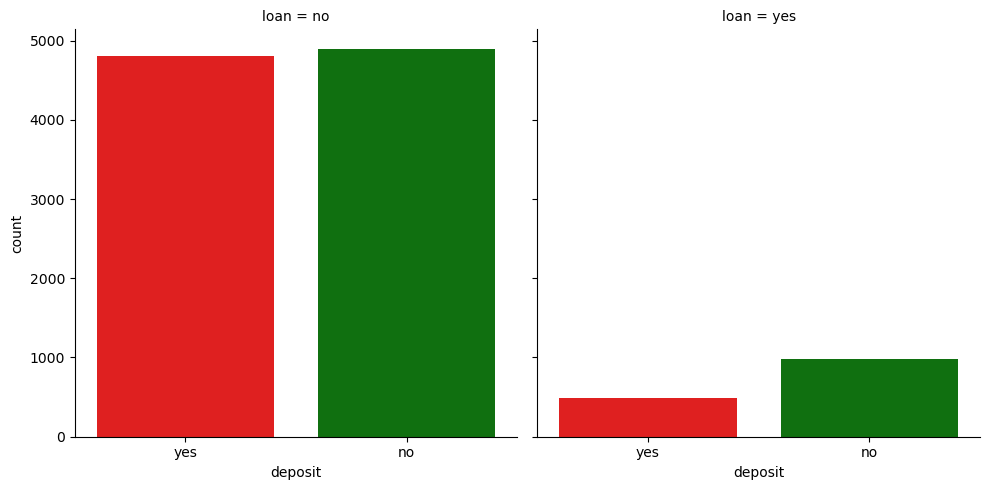

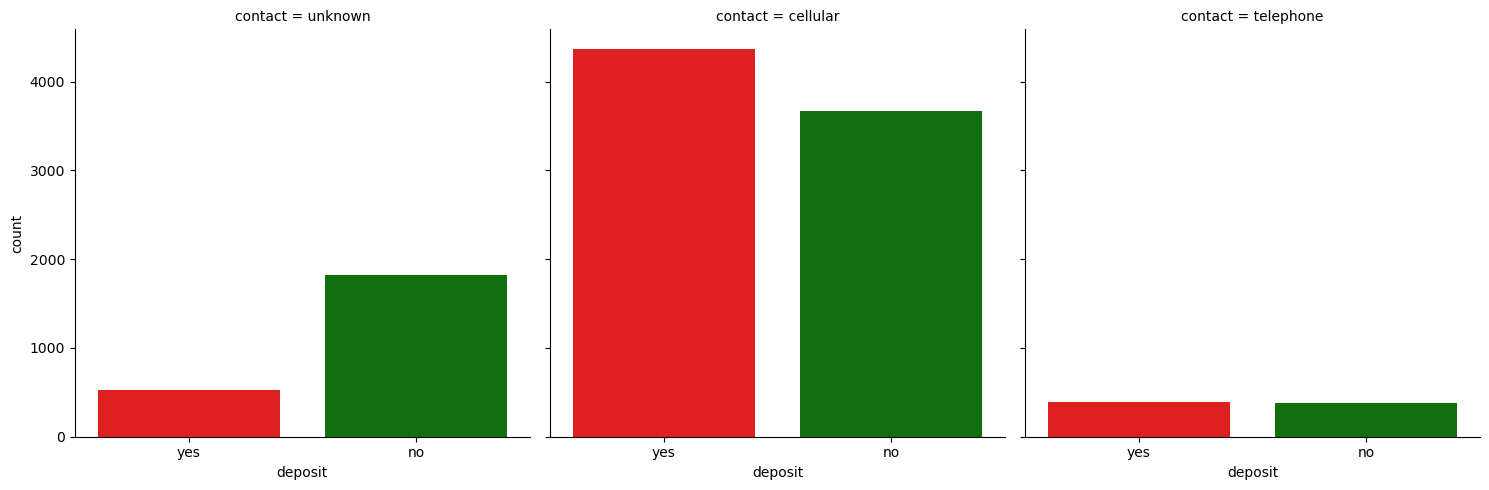

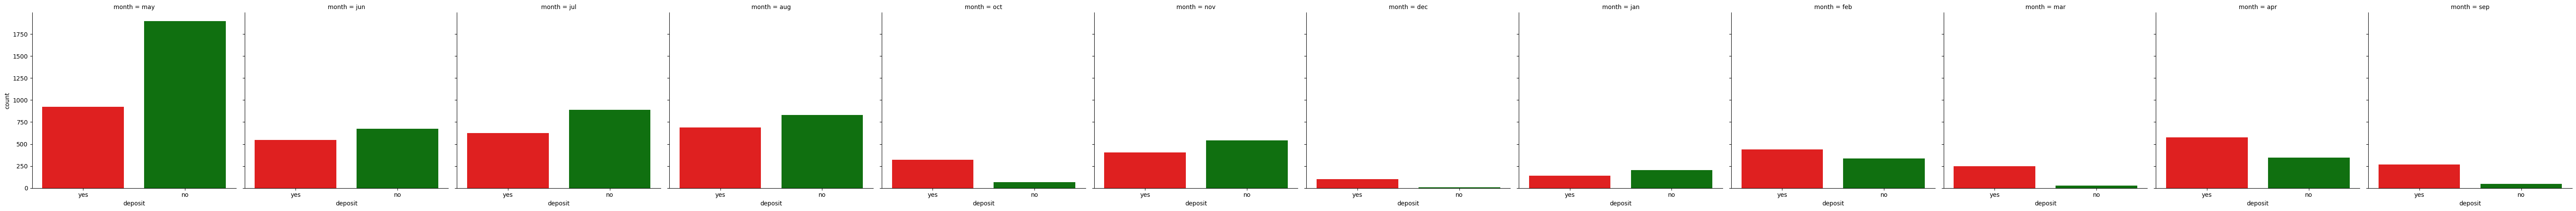

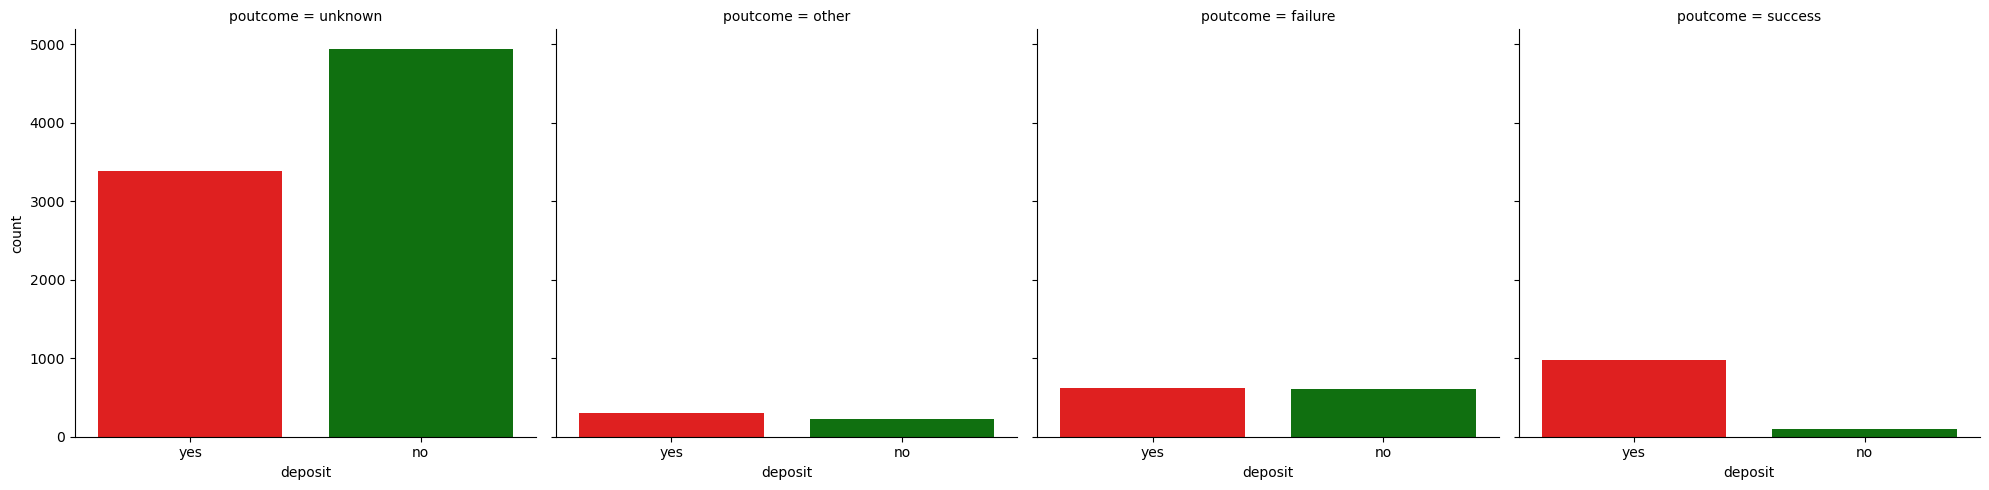

In [31]:
#check target label split over categorical features
#find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x="deposit",col=categorical_feature,kind="count",data=df,palette=["red","green"])
plt.show()

In [32]:
#check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(["deposit",categorical_feature]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

- Client who has housing loan seems to be not interested much on deposit.
- if pre campaign outcome that is poutcome=success then, there is high chance of client to show interest on deposit.
- in month of march client show high interest to deposit.
- in month of month of may, records are high but client interest ratio is very less.

In [34]:
#exploring the numerical features
numerical_features = [feature for feature in df.columns if((df[feature].dtypes!="O") &(feature not in ["deposit"]))]
print("Number of numerical features:",len(numerical_features))

#visulaize the numerical features
df[numerical_features].head()

Number of numerical features: 7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


There are 7 numerical features.

In [39]:
#find Discrete Numerical features
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


There is no Discrete Variables in the dataset.

In [42]:
#find continous numerical features
continuos_features=[feature for feature in numerical_features if feature not in discrete_feature+["deposit"]]
print("Continuos Features Count: {}".format(len(continuos_features)))

Continuos Features Count: 7


There are 7 continous numerical features

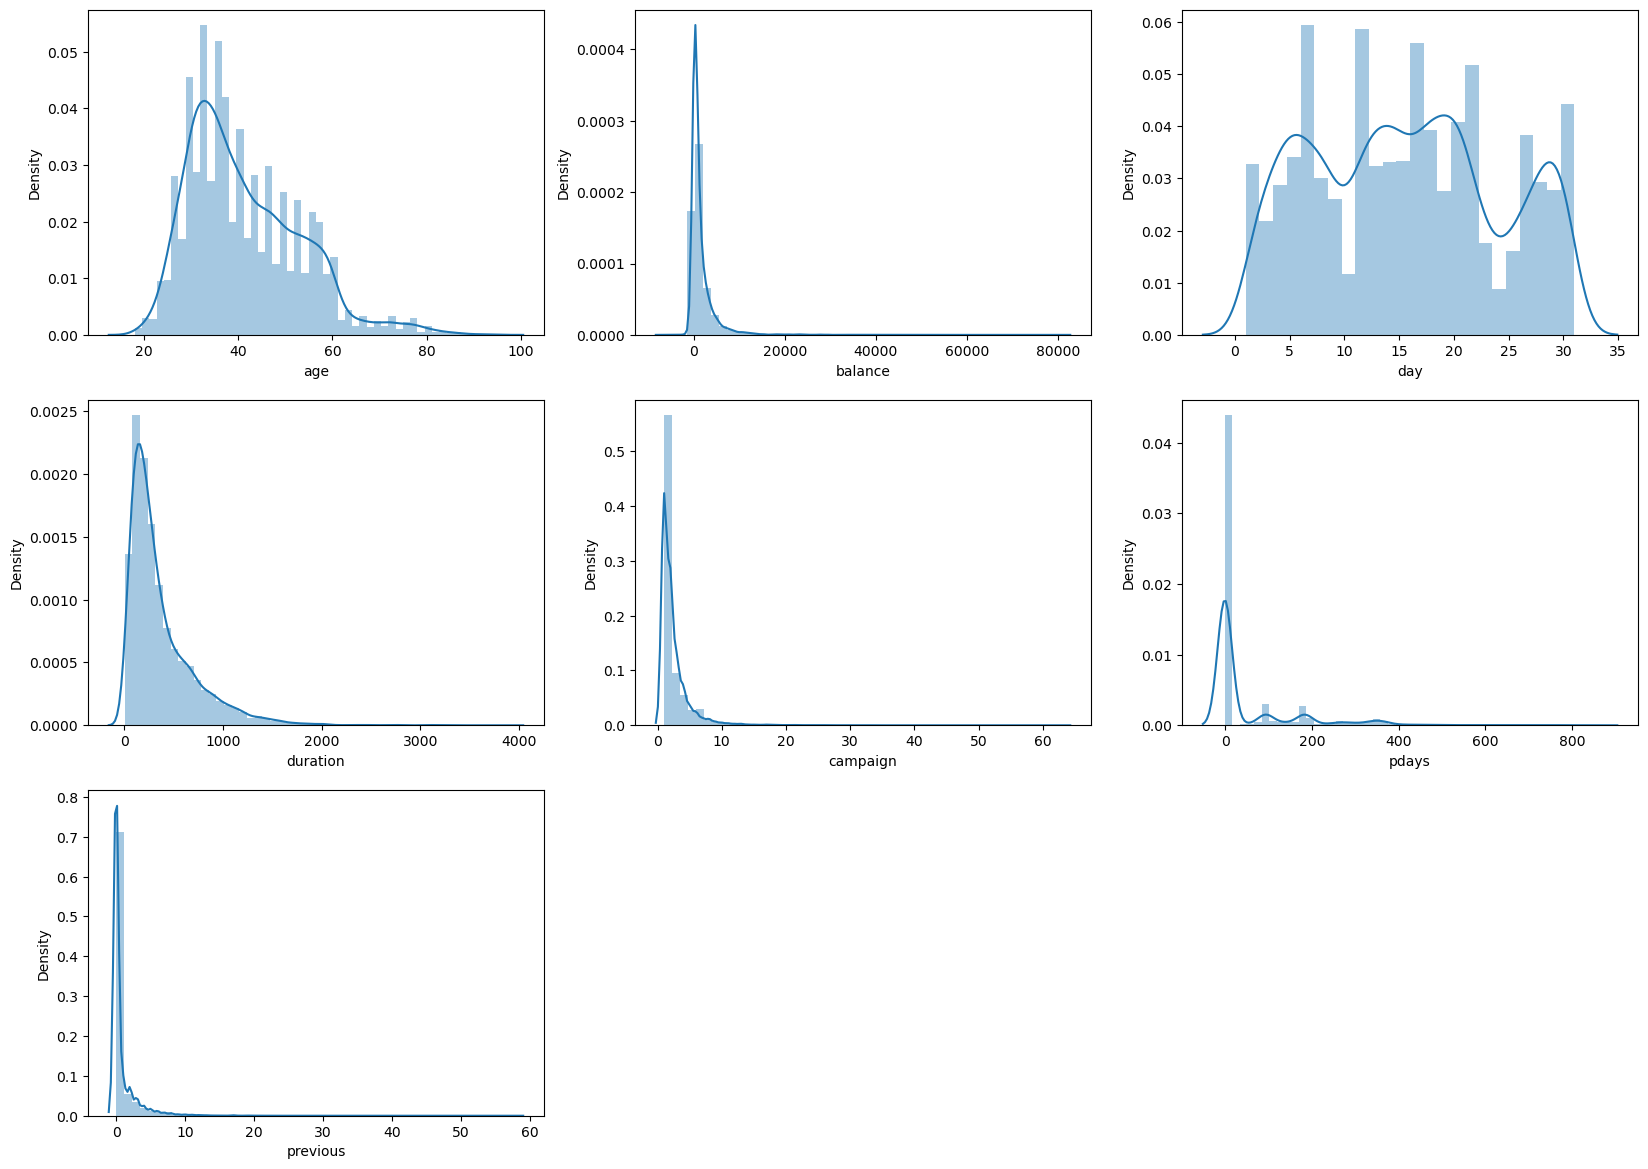

In [45]:
#Distribution of continous numerical features
#univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor="white")
plotnumber=1
for continuos_feature in continuos_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuos_feature])
    plt.xlabel(continuos_feature)
    plotnumber+=1
plt.show()

- It seems Age, Days distributed normally
- balance, duration, compaign, pdays and previous heavely skewed towards left and seems to be have some outliers

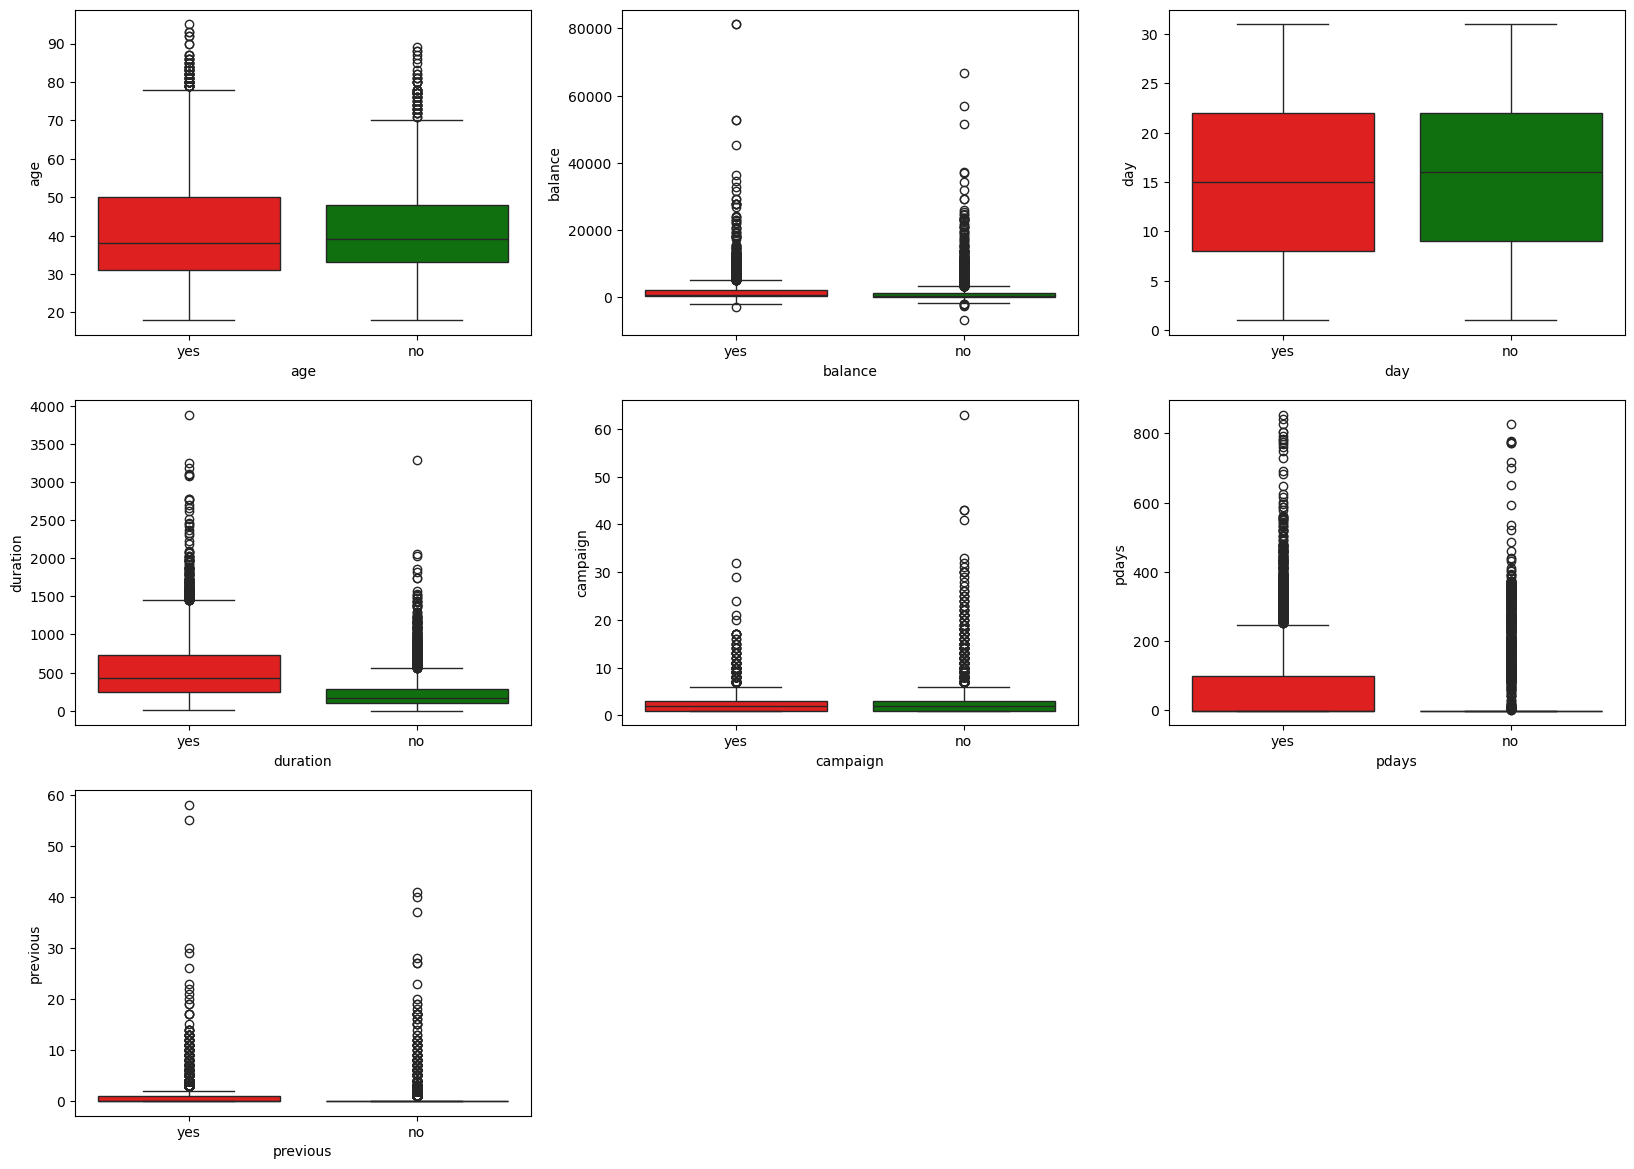

In [48]:
#Relation between continous numerical features and labels
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor="white")
plotnumber=1
for feature in continuos_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit",y=df[feature],data=df,palette=["red","green"])
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

Client shows interest on deposit who had discussion for longer duration.

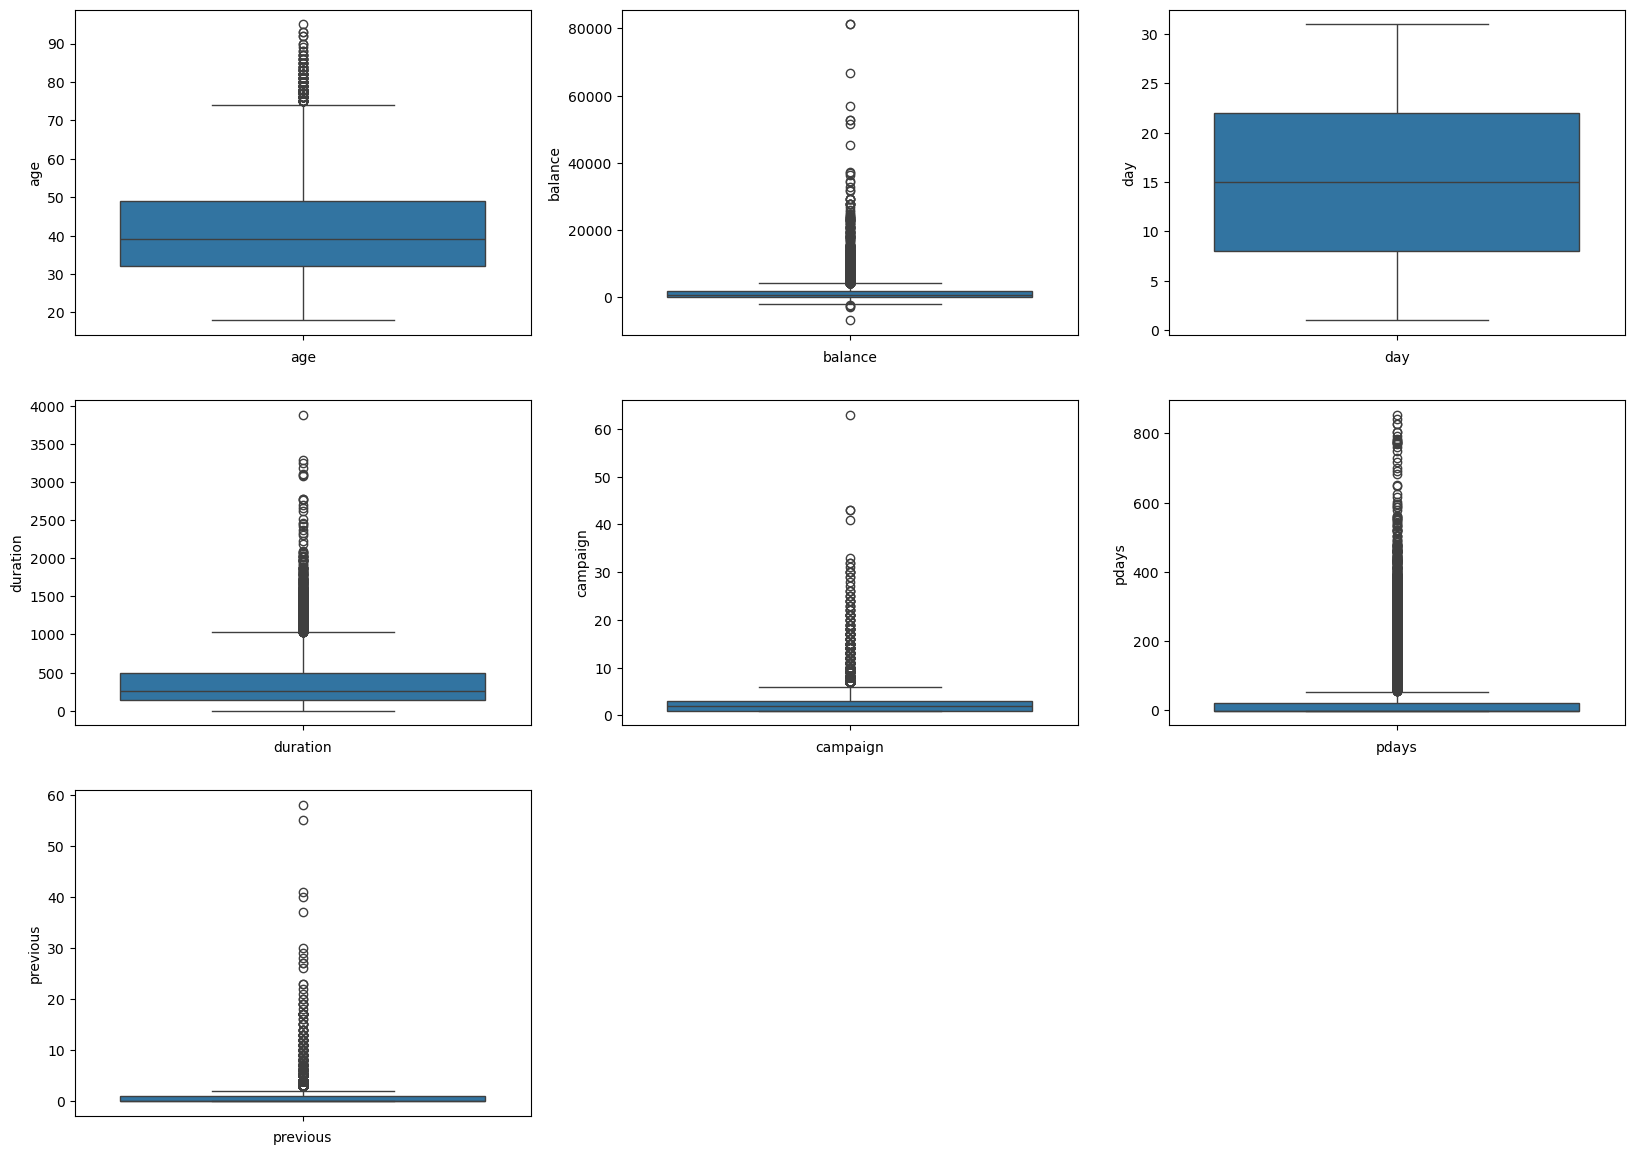

In [51]:
#find outliers in numerical features
#boxplot on numerical features to find outlier
plt.figure(figsize=(20,60), facecolor="white")
plotnumber=1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

Age, Balance, Duration, Campaign, Pdays, Previous has some outliers,

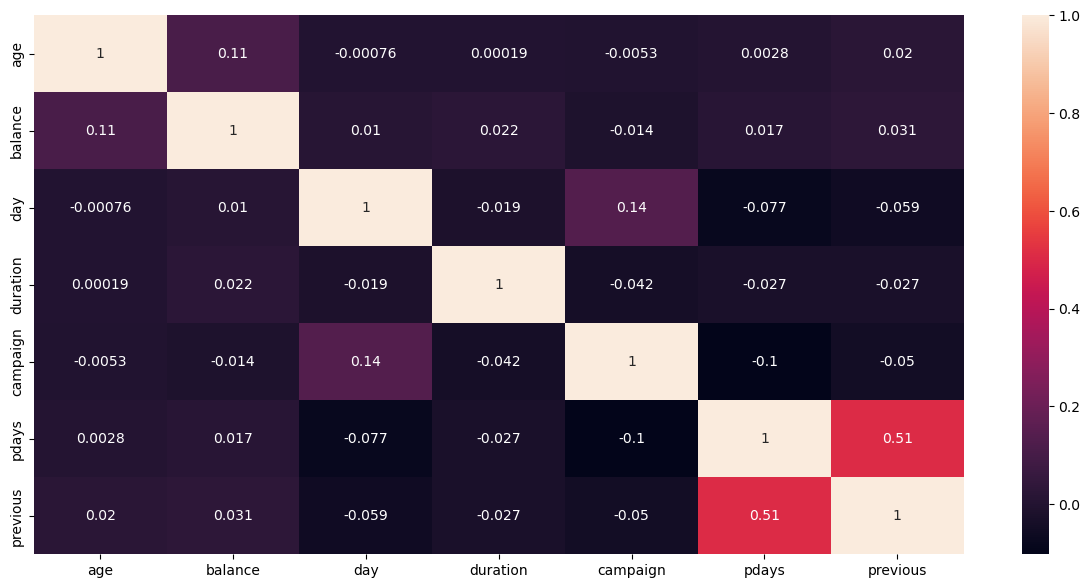

In [54]:
#Explore the correlation between numerical features
corr_mat=df.corr(numeric_only=True)
fig = plt.figure(figsize=(15,7))
sns.heatmap(corr_mat,annot=True)
plt.show()

It seems no feature is heavily correlated with other features.

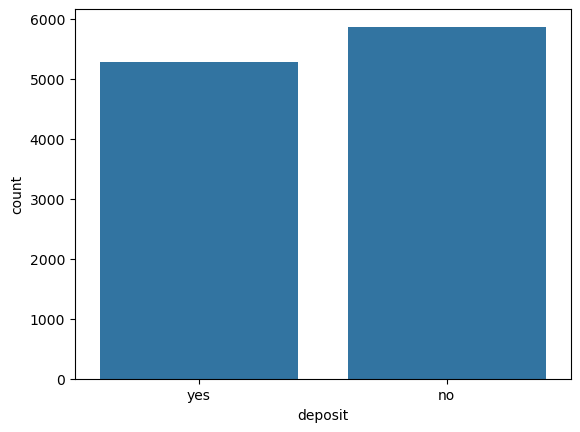

In [57]:
#Check dataset balanced or not based on target value in classification
sns.countplot(x="deposit",data=df)
plt.show()

In [59]:
df["deposit"].groupby(df["deposit"]).count()

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

 Dataset seems to be Balanced

<h1 style="font-size:25px;"><b>5. Feature Engineering</b></h1>

In [63]:
df2=df.copy()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [65]:
#default feature does not play an important role
df2.groupby(["deposit","default"]).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [67]:
df2.drop(["default"],axis=1,inplace=True)

In [69]:
df2.groupby(["deposit","pdays"]).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [71]:
#drop pdays as it has -1 value around 50%+
df2.drop(["pdays"],axis=1, inplace=True)

In [73]:
#remove outliers in feature age
df2.groupby("age",sort=True)["age"].count()
#these can be ignored and values lies in between 18 to 95

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

In [75]:
#remove outliers in feature balance
df2.groupby(["deposit","balance"],sort=True)["balance"].count()
#these outlier should not be remove as balance goes high, client show interest on deposit

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [77]:
#remove outliers in feature duration
df2.groupby(["deposit","duration"],sort=True)["duration"].count()
#these outlier should not be remove as duration goes high, client show interest on deposit

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [79]:
# remove outliers in feature campaign...
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [81]:
df3 = df2[df2['campaign'] < 33]
df3.shape

(11157, 15)

In [83]:
# remove outliers in feature previous...
df3.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [85]:
df4 = df3[df3['previous'] < 31]
df4.shape

(11152, 15)

In [87]:
df4.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,0,unknown,yes


In [89]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False).astype(int)], axis=1)

In [91]:
bool_columns = ['housing', 'loan', 'deposit']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [93]:
df4.shape

(11152, 41)

<h1 style="font-size:25px;"><b>6. Split Dataset into Training set and Test set</b></h1>

In [96]:
X = df4.drop(['deposit_new'],axis=1)
y = df4['deposit_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [98]:
len(X_train)

8921

In [100]:
len(X_test)

2231